In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cp_common import process_price_data as cpc
from cp_scratch import network_fundamentals as cpsn
from cp_scratch import basic_functions as cpsb
%matplotlib inline

Might wanna later change all calculations to GPU

In [2]:
mean, std, pd_Xtrain, pd_ytrain, pd_Xtest, pd_ytest, Xtrain, ytrainOrig, Xtest, ytestOrig = cpc.return_data()

Loaded BCHARTS/BITFINEXUSD from cache
Loaded BCHARTS/COINBASEUSD from cache


In [3]:
ytrain = cpsb.convert_to_one_hot(ytrainOrig, 9)
ytest = cpsb.convert_to_one_hot(ytestOrig, 9)

In [4]:
print(Xtrain.shape)
print(ytrainOrig.shape)
print(ytrain.shape)
print()
print(Xtest.shape)
print(ytestOrig.shape)
print(ytest.shape)

(7, 1500)
(1, 1500)
(9, 1500)

(7, 156)
(1, 156)
(9, 156)


In [23]:
def performNN(X, y, network, learning_rate, iterations, lambd, debug=0):
    
    parameters = cpsn.initialize_parameters(network, debug=1)
    amount = len(parameters) // 2
    costs = []
    
    for i in range(0,iterations):
        cache, AL = cpsn.forward_propagation(X, parameters)
        cost = cpsn.cost_function(AL, y, lambd, parameters)
        costs.append(cost)
        
        if (debug == 1):
            if (i % 500 == 0):
                print("Cost after {} iterations is: {}".format(i, cost))
        
        grads = cpsn.back_propagation(X, y, cache, parameters, lambd)
        
        for j in range(1,amount+1):
            parameters['W' + str(j)] = parameters['W' + str(j)] - learning_rate * grads['dW' + str(j)]
            parameters['b' + str(j)] = parameters['b' + str(j)] - learning_rate * grads['db' + str(j)]
    
    if (debug == 1):
        #plot costs with number of iterations
        cpsb.single_plot(costs, 'Iterations VS Cost', 'Number of Iterations', 'Cost')
        print("Final Cost: " + str(costs[-1]))
    
    return costs, parameters; #parameters is needed to compute forward_propage for other values of X

Cost after 0 iterations is: 62.26712529486212
Cost after 500 iterations is: 49.997181759168484
Cost after 1000 iterations is: 43.529724505349634
Cost after 1500 iterations is: 38.487736322547896
Final Cost: 36.94993587409344


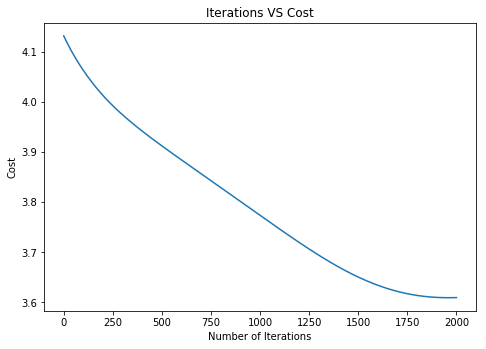

In [27]:
costs,param = performNN(Xtrain, ytrain, [7, 8, 5, 9], 0.0007, 2000, 0, debug=1) #do sth about the cost function then add random seed.